In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import pandas as pd
import itertools
from math import factorial as fact
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

## Задание 3

#### 1. Задание (в программе)
**Нарисуйте график функции:
y(x) = k∙cos(x – a) + b
для некоторых (2-3 различных) значений параметров k, a, b**

In [2]:
def f(k, x, a, b):
    """
    returns f(k,x,a,b) = k∙cos(x – a) + b
    """
    return k*np.cos(x - a) + b

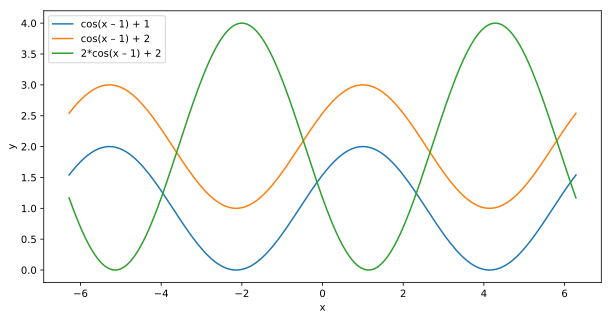

In [3]:
x = np.linspace(-2*np.pi, 2*np.pi, 200)
plt.figure(figsize=(10,5))
plt.plot(x, f(k=1, x=x, a=1, b=1), label='cos(x – 1) + 1')
plt.plot(x, f(k=1, x=x, a=1, b=2), label='cos(x – 1) + 2')
plt.plot(x, f(k=2, x=x, a=-2, b=2), label='2*cos(x – 1) + 2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y');

#### 2. Задание 
**Докажите, что при ортогональном преобразовании сохраняется расстояние между точками.**
 

????

#### 3. Задание (в программе)
**Напишите код, который будет переводить полярные координаты в декартовы.**

In [4]:
def polar_to_cartesian(r, f):
    """
    Конвертирует полярные координаты в декартовы.
    r - длина
    f - угол в градусах
    Возвращает координаты (x, y)
    """
    f = f * np.pi / 180
    x = np.cos(f) * r
    y = np.sin(f) * r
    return np.around([x, y], decimals=2)

In [5]:
polar_to_cartesian(1, 45)

array([0.71, 0.71])

In [6]:
polar_to_cartesian(1, 90)


array([0., 1.])

In [7]:
polar_to_cartesian(2, 270)


array([-0., -2.])

**Напишите код, который будет рисовать график окружности в полярных координатах.**

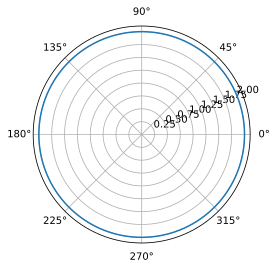

In [8]:
r=2 #  радиус окружности
x_count = 2000
x = np.linspace(0, 2*np.pi, x_count)
y = np.full((x_count,), r)
plt.polar(x, y)

#### 4. Задание (в программе)
**Решите систему уравнений:**

y = x^2 – 1

exp(x) + x∙(1 – y) = 1

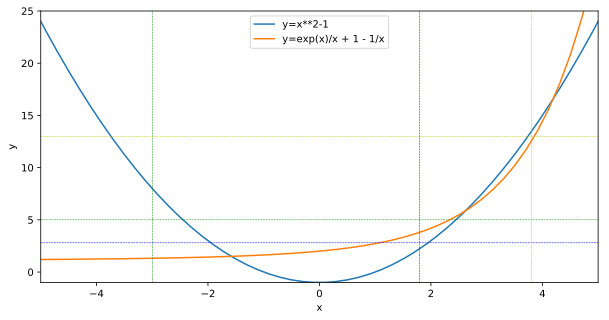

In [9]:
x = np.linspace(-50, 50, 500)
plt.figure(figsize=(10,5))
plt.ylim(-1, 25)
plt.xlim(-5, 5)
plt.plot(x, x**2-1, label='y=x**2-1')
plt.plot(x, np.exp(x)/x + 1 - 1/x, label='y=exp(x)/x + 1 - 1/x')

x1, y1 = (-3, 5)
x2, y2 = (1.8, 2.8)
x3, y3 = (3.8, 13)

plt.axvline(x=x1, color='g', linestyle='--', linewidth=0.5)
plt.axhline(y=y1, color='g', linestyle='--', linewidth=0.5)

plt.axvline(x=x2, color='b', linestyle='--', linewidth=0.5)
plt.axhline(y=y2, color='b', linestyle='--', linewidth=0.5)

plt.axvline(x=x3, color='y', linestyle='--', linewidth=0.5)
plt.axhline(y=y3, color='y', linestyle='--', linewidth=0.5)

plt.legend()
plt.xlabel('x')
plt.ylabel('y');

In [10]:
def equasions(p):
    x, y = p
    return (x**2 - 1 - y, np.exp(x)/x + 1 - 1/x - y)
x1, y1 = fsolve(equasions, (x1, y1))
x2, y2 = fsolve(equasions, (x2, y2))
x3, y3 = fsolve(equasions, (x3, y3))
print(x1, y1)
print(x2, y2)
print(x3, y3)

-1.5818353528959312 1.5022030836712823
2.618145573085455 5.854686241867173
4.200105841162916 16.640889076961916


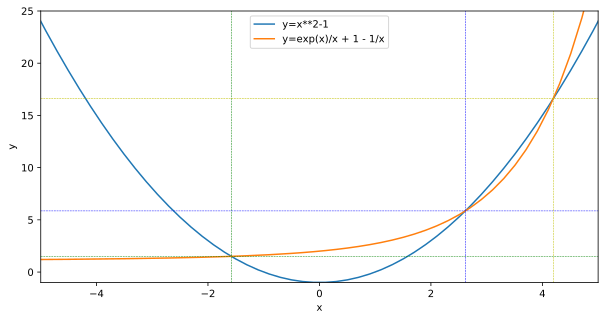

In [11]:
x = np.linspace(-50, 50, 500)
plt.figure(figsize=(10,5))
plt.ylim(-1, 25)
plt.xlim(-5, 5)
plt.plot(x, x**2-1, label='y=x**2-1')
plt.plot(x, np.exp(x)/x + 1 - 1/x, label='y=exp(x)/x + 1 - 1/x')

plt.axvline(x=x1, color='g', linestyle='--', linewidth=0.5)
plt.axhline(y=y1, color='g', linestyle='--', linewidth=0.5)

plt.axvline(x=x2, color='b', linestyle='--', linewidth=0.5)
plt.axhline(y=y2, color='b', linestyle='--', linewidth=0.5)

plt.axvline(x=x3, color='y', linestyle='--', linewidth=0.5)
plt.axhline(y=y3, color='y', linestyle='--', linewidth=0.5)

plt.legend()
plt.xlabel('x')
plt.ylabel('y');

**Решите систему уравнений и неравенств:**

y = x^2 – 1

exp(x) + x∙(1 – y) > 1

??????

# Задания к уроку 4

## 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [12]:
def wheel():
    """
    Модель рулетки
    """
    numbers = [0, 32, 15, 19, 4, 21,
           2, 25, 17, 34, 6, 27,
           13, 36, 11, 30, 8, 23,
           10, 5, 24, 16, 33, 1,
           20, 14, 31, 9, 22,18,
           29, 7, 28, 12, 35, 3, 26
    ]
    
    num = np.random.randint(37)
    
    if num == 0:
        color = 'zero!'
    elif num % 2 == 0:
        color = 'black'
    else:
        color = 'red'

    return (numbers[num], color)

In [13]:
# Выполним 10000 "вращений" рулетки
runs = 10000
results = {}
for _ in range(runs):
    result = wheel()
    results[result] = results.setdefault(result, 0) + 1

In [14]:
# Посчитаем статистику по каждому полю и общую сумму вероятностей
total_p = 0
for count, run in results.items():
    probability = run/runs
    total_p += probability
    print(f'{count[0]} {count[1]} probability is {probability}')
print()
print(f'Сумма всех веростностей равна {total_p}')

22 black probability is 0.0275
24 black probability is 0.0282
14 red probability is 0.0251
20 black probability is 0.0269
27 red probability is 0.0229
36 red probability is 0.0271
16 red probability is 0.0283
35 black probability is 0.0274
2 black probability is 0.025
12 red probability is 0.0235
23 red probability is 0.0261
13 black probability is 0.0276
21 red probability is 0.0268
0 zero! probability is 0.029
29 black probability is 0.0292
15 black probability is 0.026
7 red probability is 0.0257
9 red probability is 0.0274
17 black probability is 0.0249
28 black probability is 0.0268
6 black probability is 0.0295
19 red probability is 0.0252
1 red probability is 0.029
5 red probability is 0.0276
3 red probability is 0.0314
10 black probability is 0.0245
11 black probability is 0.0284
34 red probability is 0.0257
18 red probability is 0.0282
4 black probability is 0.0261
33 black probability is 0.0263
31 black probability is 0.0294
32 red probability is 0.0283
26 black probability i

## 2. 

**1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки.**

In [15]:
def flip_coin():
    """
    Модель монеты
    """
    x = np.random.uniform(0, 10)
    if x < 5:
        return (1, 'орел')
    else:
        return (0, 'решка')

In [16]:
# смоделируем подбрасывание двух монет и посчитаем вероятность выпадения двух орлов.  P(AB) = P(A)*P(B)
# вероятность выпадения орла = 1/2, двух орлов = 1/2*1/2=1/4=0.25 
# Проверим:
runs = 100000
count = 0

for i in range(runs):
    coin1, _ = flip_coin()
    coin2, _ = flip_coin()
    if coin1 == 1 and coin2 == 1:
        count += 1
print(f'Из {runs} подбрасываний 2 монет, одновременно выпали орлы в {count} случаях')
print(f'Вероятность такого исхода = {count/runs}')

Из 100000 подбрасываний 2 монет, одновременно выпали орлы в 25155 случаях
Вероятность такого исхода = 0.25155


**2) Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.**

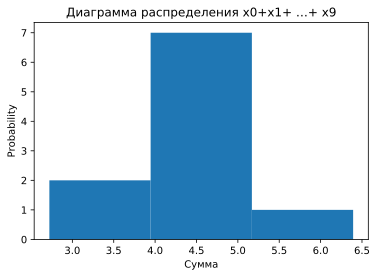

In [17]:
np.random.seed(2)
x = np.random.rand(10,10)
plt.hist(x.sum(axis=1), 3);
plt.ylabel('Probability')
plt.xlabel('Сумма')
plt.title('Диаграмма распределения х0+х1+ …+ x9');

Text(0.5,1,'Диаграмма распределения х0+х1+ …+ х1000')

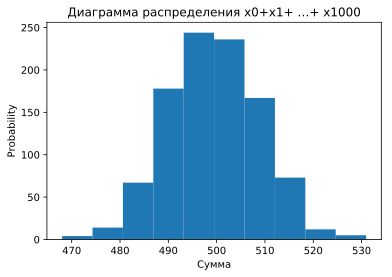

In [18]:
np.random.seed(2)
x = np.random.rand(1000,1000)
plt.hist(x.sum(axis=1), 10);
plt.ylabel('Probability')
plt.xlabel('Сумма')
plt.title('Диаграмма распределения х0+х1+ …+ х1000')

## 3.

**1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.**

In [19]:
def monte_carlo_test(runs=100, n=2, k=1):
    """
    Монте-Карло тест с монетой
    """
    np.random.seed(42)
    m = np.random.randint(0, 2, size=(n, runs))
    m_sum = np.isin(np.sum(m, axis=0), k).sum()
    print(f'{k} успешных событий произошло {m_sum} раз из {runs} испытаний')
    print(f'Вероятность {k} успешных событий = {m_sum/runs}')

In [20]:
monte_carlo_test(runs=100000, n=4, k=2)

2 успешных событий произошло 37653 раз из 100000 испытаний
Вероятность 2 успешных событий = 0.37653


$P_{n}(k)=C\binom{k}{n}\frac{1}{2^n}=\frac{4!}{2!(4-2)!}*\frac{1}{2^{4}}=\frac{3}{8}=0.375$

Вычисления с помощью формулы Бернулли совпадают с независимыми испытаниями Монте-Карло.

**2) Повторите расчеты, взяв другие значения n и k.**

In [21]:
monte_carlo_test(runs=1000000, n=13, k=4)

4 успешных событий произошло 86981 раз из 1000000 испытаний
Вероятность 4 успешных событий = 0.086981


$P_{n}(k)=C\binom{k}{n}\frac{1}{2^n}=\frac{13!}{4!(13-4)!}*\frac{1}{2^{13}}=\frac{6227020800}{71345111040}=0.0872$

Вычисления с помощью формулы Бернулли совпадают с независимыми испытаниями Монте-Карло.

## 4. Повторите расчеты, взяв другие значения n и k.

In [22]:
examples = []
for p in itertools.permutations('0123456789', 10):
    examples.append(''.join(str(x) for x in p))

print(len(examples))

3628800


In [23]:
examples = []
for p in itertools.permutations('0123456789', 2):
    examples.append(''.join(str(x) for x in p))

print(len(examples))

90


In [24]:
examples = []
for p in itertools.combinations('0123456789', 2):
    examples.append(''.join(str(x) for x in p))

print(len(examples))

45


## 5. Дополните код расчетом коэффициента корреляции x и y по формуле

Матрица корреляции средствами numpy:
[[1.         0.91254432]
 [0.91254432 1.        ]]



Корреляция переменных x и y, посчитанная вручную:
0.912544315369824


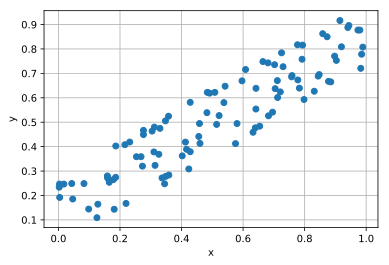

In [40]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
c = np.corrcoef(x, y)
print(f'Матрица корреляции средствами numpy:\n{c}')

# считаем корреляцию "руками"
xm = np.sum(x) / n
ym = np.sum(y) / n
r = np.sum( (x - xm)*(y - ym) ) / np.sqrt( np.sum((x - xm)**2) * np.sum((y - ym)**2) )
print('\n\n')
print(f'Корреляция переменных x и y, посчитанная вручную:\n{r}')


# Практическое задание №5

## Фото с работой на листочке [тут](https://drive.google.com/file/d/1-Gkj3arjircH2Slc-EtRnszyTbf5Dv9n/view?usp=sharing)

## 5.1.
Вектор – это частный случай матрицы 1хN и Nх1. Повторите материал для векторов, уделяя особое внимание умножению A∙B.
Вычислите, по возможности не используя программирование: (5Е)^-1, где Е – единичная матрица размера 5х5.


In [26]:
a = 5 * np.identity(5)

In [27]:
a

array([[5., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0.],
       [0., 0., 5., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 5.]])

In [28]:
b = np.linalg.inv(a)
b

array([[0.2, 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0.2]])

In [29]:
np.dot(a, b)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 5.2.
Вычислите определитель:


In [30]:
a = np.array([[1, 2, 3],
              [4, 0, 6],
              [7, 8, 9]])
np.linalg.det(a)

59.999999999999986

## 5.3.
**1) Вычислите матрицу, обратную данной:**


In [31]:
a = np.array([[1, 2, 3],
              [4, 0, 6],
              [7, 8, 9]])
np.linalg.inv(a)

array([[-0.8       ,  0.1       ,  0.2       ],
       [ 0.1       , -0.2       ,  0.1       ],
       [ 0.53333333,  0.1       , -0.13333333]])

**2) Приведите пример матрицы 4х4, ранг которой равен 1.**

In [32]:
a = np.array([[0, 1, 0, 1],
              [0, 1, 0, 1],
              [0, 1, 0, 1],
              [0, 1, 0, 1]])
np.linalg.matrix_rank(a)

1

In [33]:
b = np.array([[1, 0, 1, 0],
              [1, 0, 1, 0],
              [1, 0, 1, 0],
              [1, 0, 1, 0]])
np.linalg.matrix_rank(b)

1

In [34]:
c = np.array([[0, 0, 0, 0],
              [7, 7, 7, 7],
              [0, 0, 0, 0],
              [7, 7, 7, 7]])
np.linalg.matrix_rank(c)

1

In [35]:
d = np.array([[13, 13, 13, 13],
              [ 0,  0,  0,  0],
              [13, 13, 13, 13],
              [ 0,  0,  0,  0]])
np.linalg.matrix_rank(d)

1

## 5.4.
**Вычислите скалярное произведение двух векторов:  
(1, 5)  и  (2, 8)**


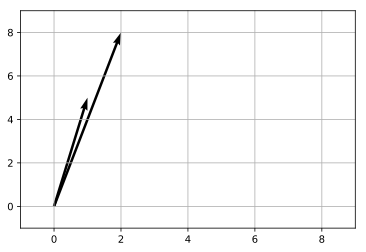

In [36]:
a = np.array([1, 5], float)
b = np.array([2, 8], float)
X, Y = np.array([0, 0]), np.array([0, 0])
U, V = np.array([a[0], b[0]]), np.array([a[1], b[1]])

plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)

plt.xlim(-1, 9)
plt.ylim(-1, 9)
plt.grid()

In [37]:
np.inner(a, b)

42.0

## 5.5
**Вычислите смешанное произведение трех векторов:
(1, 5, 0), (2, 8, 7) и (7, 1.5, 3)**


In [38]:
a = np.array([1, 5, 0], float)
b = np.array([2, 8, 7], float)
c = np.array([7, 1.5, 3], float)
v = np.cross(a, b)
print(np.inner(v, c))
w = np.cross(b, c)
print(np.inner(w, a))

228.5
228.5
